In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Perda Motley Keenan

In [31]:
xt = 6
yt = 7.5
nx = 80
ny = 40
x0 = 2.83
y0 = 0.54
f = 5200
gt = 5  
gr = 0 

lf = 32.5 + np.log10(f) + 20 * np.log10(0.001) - gt - gr

dx = np.linspace(0, xt, nx)
dy = np.linspace(0, yt, ny)

medidas1 = []

for i in range(ny):
    medidas1.append([])
    
for i in range(ny):
    for j in range(nx):
        medidas1[i].append(lf + 20 * np.log10(np.sqrt(np.power(dx[j] - x0, 2) + np.power(dy[i] - y0, 2)) * 1000))

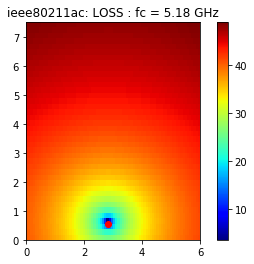

In [33]:
fig, ax = plt.subplots()
ax.plot(x0, y0, 'o', color='red')
#plt.title("Perda pelo Modelo Motley Keenan")
plt.title('ieee80211ac: LOSS : fc = 5.18 GHz')
plt.imshow(medidas1,cmap='jet',extent=[0,6,0,7.5],origin='lower')
plt.colorbar()
plt.show()

# Perda Sombreamento LogNormal

In [13]:
xt = 6
yt = 7.5
nx = 80
ny = 40
x0 = 2.83
y0 = 0.54
prdo = -29.4
do = 0.000455412
n = 1.7145 
desviopadrao = 4.3757 
ptdb = 15.5

Lf = ptdb - prdo + gt + gr
dx = np.linspace(0, xt, nx)
dy = np.linspace(0, yt, ny)

medidas1 = []

for i in range(ny):
    medidas1.append([])
    
for i in range(ny):
    for j in range(nx):
        medidas1[i].append(np.sqrt(np.power(dx[j] - x0, 2) + np.power(dy[i] - y0, 2)) / 1000)
        
desvio = 0

X = np.random.normal(0, desviopadrao, len(medidas1))

PL2 = []

for i in range(ny):
    PL2.append([])

for i in range(ny):
    for j in range(nx):
        oi = Lf + 10 * n * np.log10(medidas1[i][j] / do) + X[i]
        PL2[i].append(oi)

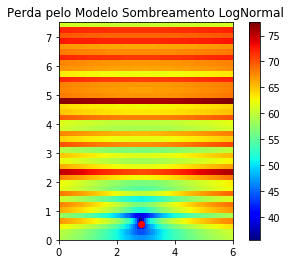

In [14]:
fig, ax = plt.subplots()
ax.plot(x0, y0, 'o', color='red')
plt.title("Perda pelo Modelo Sombreamento LogNormal")
plt.imshow(PL2,cmap='jet',extent=[0,6,0,7.5],origin='lower')
plt.colorbar()
plt.show()

# Pr Sombreamento LogNormal

In [15]:
pr = []
for i in range(ny):
    pr.append([])

for i in range(ny):
    for j in range(nx):
        oi = ptdb - PL2[i][j]
        pr[i].append(oi)

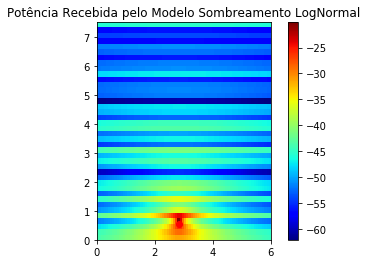

In [16]:
fig, ax = plt.subplots()
ax.plot(x0, y0, 'o', color='red')
plt.title("Potência Recebida pelo Modelo Sombreamento LogNormal")
plt.imshow(pr,cmap='jet',extent=[0,6,0,7.5],origin='lower')
plt.colorbar()
plt.show()

# SNR Sombreamento LogNormal

In [27]:
noise = 0
t = 300
b = 1.38064852 * 10**-23 
bmhz = 20

pr2 = []

for i in range(ny):
    pr2.append([])

divisor = np.power(10, noise/10) * b * t * bmhz * 10**-6
    
for i in range(ny):
    for j in range(nx):
        oi = pr[i][j] / divisor
        pr2[i].append(oi)

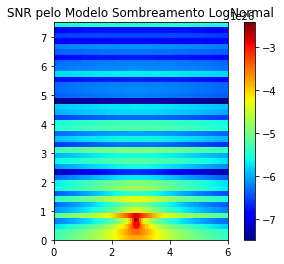

In [28]:
fig, ax = plt.subplots()
ax.plot(x0, y0, 'o', color='red')
plt.title("SNR pelo Modelo Sombreamento LogNormal")
plt.imshow(pr2,cmap='jet',extent=[0,6,0,7.5],origin='lower')
plt.colorbar()
plt.show()

# Gráfico de 3 Dimensões

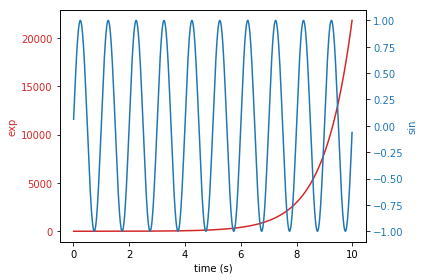

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
